In [2]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [3]:
df = pd.read_csv("Employee.csv")
df

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

<AxesSubplot:ylabel='LeaveOrNot'>

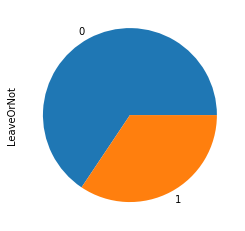

In [4]:
df["LeaveOrNot"].value_counts().plot.pie()

In [5]:
#the data is umbalanced 

In [6]:
df.shape


(4653, 9)

In [7]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Education  JoiningYear   City  PaymentTier    Age  Gender  EverBenched  \
0         False        False  False        False  False   False        False   
1         False        False  False        False  False   False        False   
2         False        False  False        False  False   False        False   
3         False        False  False        False  False   False        False   
4         False        False  False        False  False   False        False   
...         ...          ...    ...          ...    ...     ...          ...   
4648      False        False  False        False  False   False        False   
4649      False        False  False        False  False   False        False   
4650      False        False  False        False  False   False        False   
4651      False        False  False        False  False   False        False   
4652      False        False  False        False  False   

In [8]:
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
df.duplicated().value_counts()

False    2764
True     1889
dtype: int64

In [11]:
df["City"].duplicated()

0       False
1       False
2       False
3        True
4        True
        ...  
4648     True
4649     True
4650     True
4651     True
4652     True
Name: City, Length: 4653, dtype: bool

# OUTLIERS

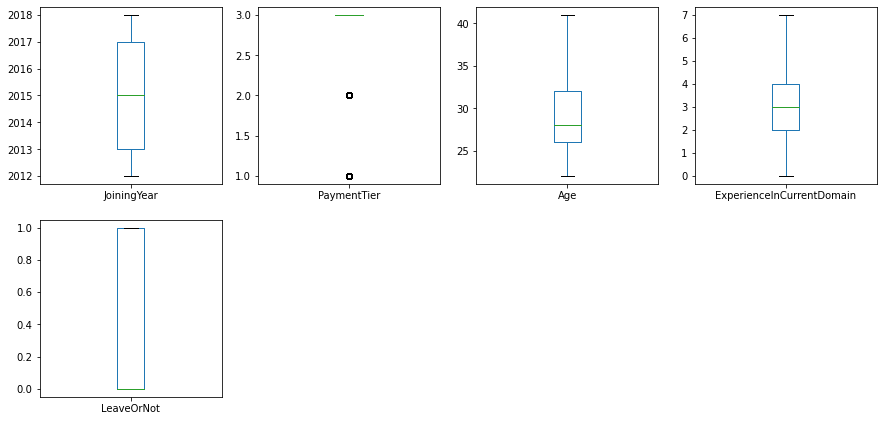

In [12]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (15, 15));

In [13]:
df_outliers = df.PaymentTier
df_outliers

0       3
1       1
2       3
3       3
4       3
       ..
4648    3
4649    2
4650    3
4651    3
4652    3
Name: PaymentTier, Length: 4653, dtype: int64

In [14]:
(df_outliers == 3).sum()

3492

In [15]:
(df_outliers == 2).sum()

918

In [16]:
(df_outliers == 1).sum()

243

# DATA VISUALISATION

<AxesSubplot:xlabel='Gender', ylabel='LeaveOrNot'>

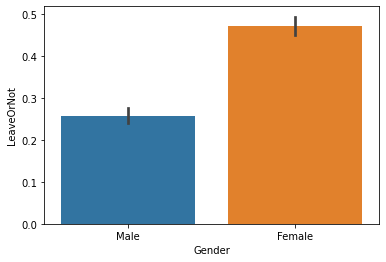

In [17]:
sns.barplot(x=df["Gender"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='EverBenched', ylabel='LeaveOrNot'>

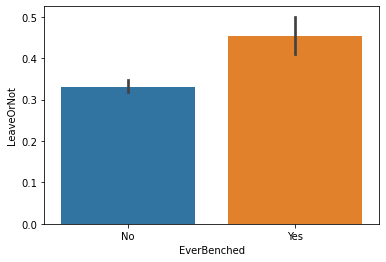

In [18]:
sns.barplot(x=df["EverBenched"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='Education', ylabel='LeaveOrNot'>

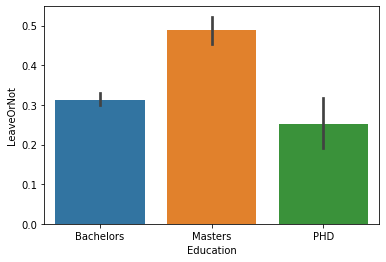

In [19]:
sns.barplot(x=df["Education"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='PaymentTier', ylabel='LeaveOrNot'>

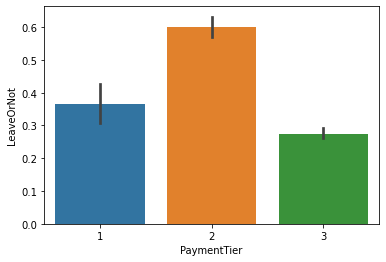

In [20]:
sns.barplot(x=df["PaymentTier"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='Age', ylabel='LeaveOrNot'>

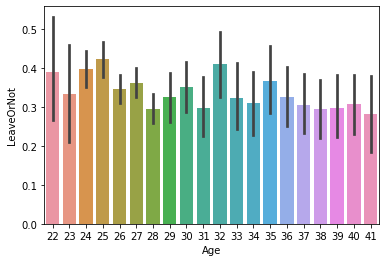

In [21]:
sns.barplot(x=df["Age"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='JoiningYear', ylabel='LeaveOrNot'>

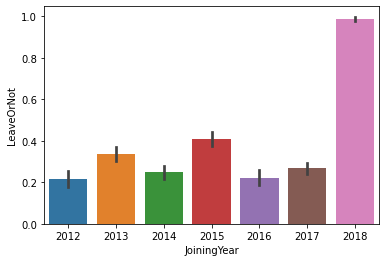

In [22]:
sns.barplot(x=df["JoiningYear"] , y=df["LeaveOrNot"])

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='LeaveOrNot'>

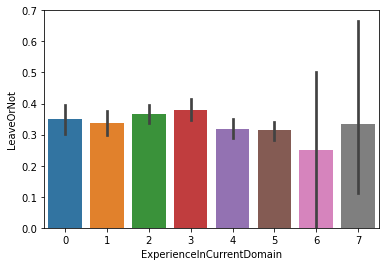

In [23]:
sns.barplot(x=df["ExperienceInCurrentDomain"] , y=df["LeaveOrNot"])

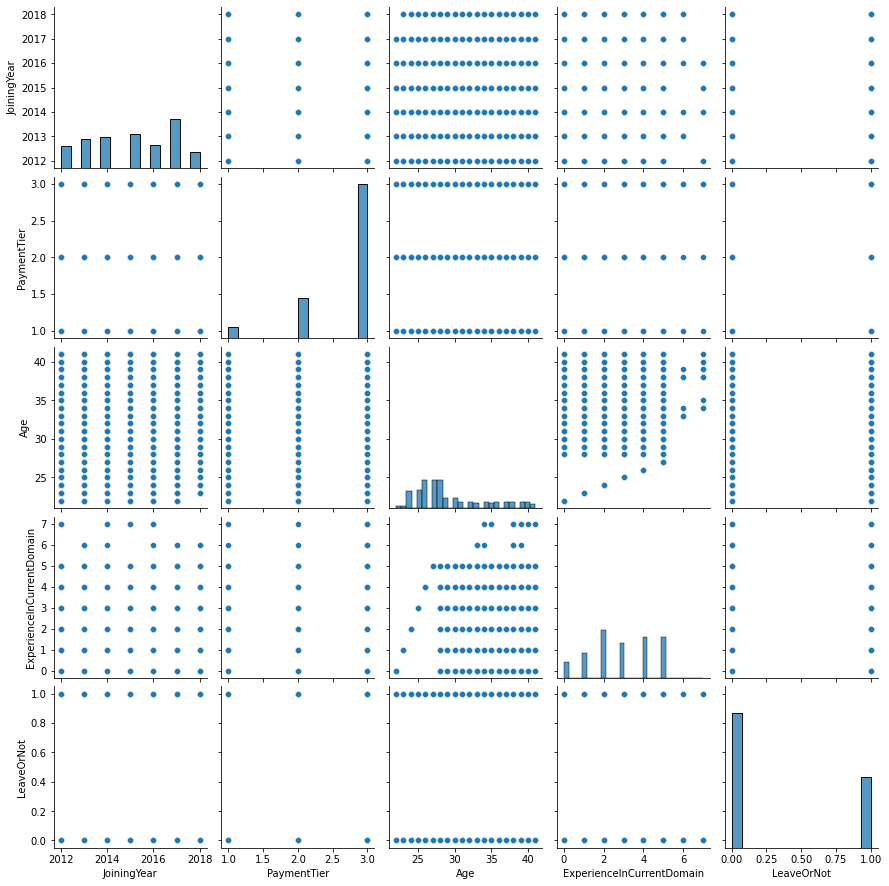

In [24]:
sns.pairplot(df)

<AxesSubplot:>

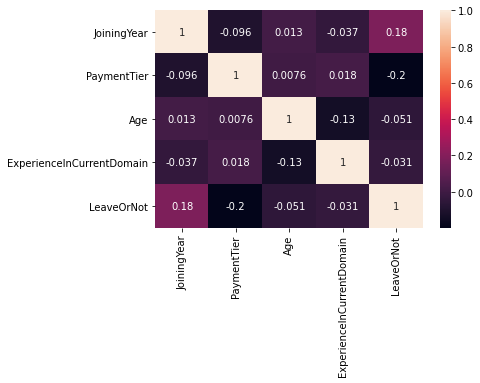

In [25]:
sns.heatmap(df.corr(), annot=True)

In [26]:
df

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

In [27]:
X = df.drop(["LeaveOrNot" ], axis=1)
y = df.LeaveOrNot

In [28]:
categ = ['Education','City','Gender','EverBenched']

In [29]:
le = LabelEncoder()

In [30]:
df[categ] = df[categ].apply(le.fit_transform)

In [31]:
df

Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0             0         2017     0            3   34       1            0   
1             0         2013     2            1   28       0            0   
2             0         2014     1            3   38       0            0   
3             1         2016     0            3   27       1            0   
4             1         2017     2            3   24       1            1   
...         ...          ...   ...          ...  ...     ...          ...   
4648          0         2013     0            3   26       0            0   
4649          1         2013     2            2   37       1            0   
4650          1         2018     1            3   27       1            0   
4651          0         2012     0            3   30       1            1   
4652          0         2015     0            3   33       1            1   

      ExperienceInCurrentDomain  LeaveOrNot  
0                             0           0  
1                             3           1  
2                             2           0  
3                             5           1  
4                             2           1  
...                         ...         ...  
4648                          4           0  
4649                          2           1  
4650                          5           1  
4651                          2           0  
4652                          4           0  

[4653 rows x 9 columns]

In [33]:
df.to_csv("clean.csv")